<a href="https://colab.research.google.com/github/dsdayat/Hyperparameter-Tunning-Classification/blob/main/HW_HPTUNING_AGUS_NUR_HIDAYAT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

- Load churn.csv as DataFrame
- Basic data cleaning (missing values, duplicates) (10 points)
- Split the data: training & testing (10 points)
- Multicollinearity study (10 points)
- And feature selection (if any)
- Recall: the threshold is at least 0.8 (absolute value)
- Handle categorical data (20 points)
- Column with 2 distinct values → convert to binary numeric {0,1}
- Else → One Hot Encode
- Choose the appropriate metric for fitting the model (10 points)
- Train any classification model you’d prefer (30 points)
- YET please ensure you do hyperparameter tuning
- Evaluate the model on test data (10 points)













In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [60]:
df=pd.read_csv('telco.csv')

In [61]:
dfn=df.copy()

In [62]:
dfn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [63]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [64]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [65]:
dfn['TotalCharges']=pd.to_numeric(dfn['TotalCharges'], errors='coerce')

In [66]:
dfn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000



# - Basic data cleaning (missing values, duplicates) (10 points)


In [67]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [68]:
dfn.isna().sum() * 100 / len(dfn)

customerID          0.000000
gender              0.000000
SeniorCitizen       0.000000
Partner             0.000000
Dependents          0.000000
tenure              0.000000
PhoneService        0.000000
MultipleLines       0.000000
InternetService     0.000000
OnlineSecurity      0.000000
OnlineBackup        0.000000
DeviceProtection    0.000000
TechSupport         0.000000
StreamingTV         0.000000
StreamingMovies     0.000000
Contract            0.000000
PaperlessBilling    0.000000
PaymentMethod       0.000000
MonthlyCharges      0.000000
TotalCharges        0.156183
Churn               0.000000
dtype: float64

- *there is missing value in Total Charges feature and handled by dropping null 


In [69]:
dfn[dfn['TotalCharges'].isna()] #lihat data yang nan, tenurenya 0, bisa di negasi /dihilangkan

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


In [70]:
dfn=dfn[~dfn['TotalCharges'].isna()]#menegasikan missing value

In [71]:
dfn.info()#cek apa data  missing valuenya sudah hilang dan datanya sesuai

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [72]:
dfn.isna().sum() * 100 / len(dfn)

customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

In [73]:
dfn.duplicated().sum()

0

In [74]:
dfn = dfn.drop_duplicates()#drop kalo ada duplicated data

In [75]:
dfn.duplicated().sum()#cek lagi ada duplicated atau engga

0

- there is no duplicated value

In [76]:
# Encode the Target for heatmap correlation
### Encoding yes no
yes_no_dict = {
    'Yes':int(1),
    'No':0,
    
}

for colname in ['Churn']:
    dfn[colname] = dfn[colname].map(yes_no_dict)

# **Statistical summary of columns**

In [77]:
#bikin kategori 
categoricals = dfn.select_dtypes(include=['object'])
numericals = dfn.select_dtypes(exclude=['object'])
nums = ['SeniorCitizen','tenure','MonthlyCharges','TotalCharges']
nuv=xstd = pd.DataFrame(data = dfn, columns = nums)

In [78]:
numericals.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441,0.265785
std,0.368844,24.545260,30.085974,2266.771362,0.441782
min,0.000000,1.000000,18.250000,18.800000,0.000000
25%,0.000000,9.000000,35.587500,401.450000,0.000000
50%,0.000000,29.000000,70.350000,1397.475000,0.000000
75%,0.000000,55.000000,89.862500,3794.737500,1.000000
max,1.000000,72.000000,118.750000,8684.800000,1.000000


### Observation Statistical Summary untuk Numerical
- there is no missing value that shown in similar count of each feature
1. Nilai minimum dan maximum  OK reasonable
2. [Tenure], mean > median has skewed distribution
3. [MonthlyCharges], mean < median has skewed distribution
4. [Total charges], mean > median has skewed distribution

In [79]:
categoricals.describe()

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod
count,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032,7032
unique,7032,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check
freq,1,3549,3639,4933,6352,3385,3096,3497,3087,3094,3472,2809,2781,3875,4168,2365


### Observation Statistical Summary untuk Categoricals
1. There are 7032 customers, dominated by male who single without dependents and has phone services.
2. fiber optic is the most common used for internetservice
3. Monthly contract with electronic check payment is the most common practice and not make churn. 
- CustomerID is not valuable feature, then just drop it


In [80]:
dfn=dfn.drop(['customerID'], axis=1)#drop 

# **Univariate analysis**

analisa bikin boxplot untuk cari tau apakah ada outliers, data distribusinya gimana setiap kolom



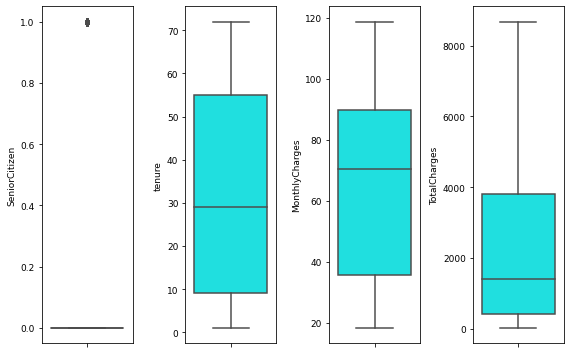

In [81]:
plt.figure(figsize=(8,5))

features = nums
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=dfn[features[i]], color='cyan')
    plt.tight_layout()

Observation Boxplot
1. there is no outliers

In [82]:
outlier = dfn['SeniorCitizen'].max()

dfn[dfn['SeniorCitizen'] == outlier]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,Male,1,No,No,1,No,No phone service,DSL,No,No,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,1
30,Female,1,Yes,No,71,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,No,No,Two year,Yes,Credit card (automatic),96.35,6766.95,0
31,Male,1,Yes,No,2,Yes,No,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Credit card (automatic),95.50,181.65,0
34,Male,1,No,No,1,Yes,No,DSL,No,No,No,No,No,No,Month-to-month,No,Bank transfer (automatic),45.25,45.25,0
50,Female,1,No,No,43,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Electronic check,90.25,3838.75,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.40,0
7029,Female,1,No,No,6,No,No phone service,DSL,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,44.40,263.05,0
7031,Male,1,Yes,No,55,Yes,Yes,DSL,Yes,Yes,No,No,No,No,One year,No,Credit card (automatic),60.00,3316.10,0
7032,Male,1,No,No,1,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,75.75,75.75,1


# Inspect Column Distribution (KDE Plots)

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

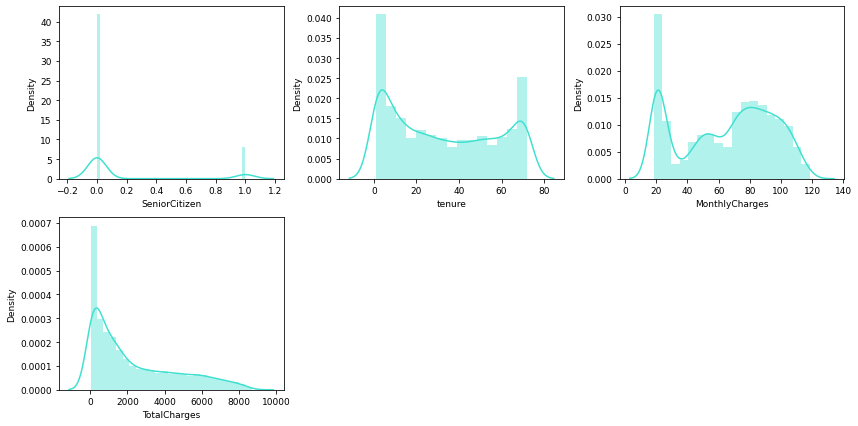

In [83]:
plt.figure(figsize=(12,6))
features = nums
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=dfn[features[i]], color='turquoise')
    plt.xlabel(features[i])
    plt.tight_layout()

Observation Distribution Column
1. since the feauture of [SeniorCitizen] only has two choice, the plot shown symetrical but imbalance

1. The most customers are (distribution peak):
*   not senior Citizen
*   who have 5 months Tenure
*   who have about 20 monthly charges
*   who has about 200 total charges

2. Tenure and Monthly charges have Multi modal plot

3. Total Charges is positively skewed (log transformation is necessary if implemented on modelling)

# Bivariate Analysis

In [84]:
import numpy as np

In [85]:
ctg= ['gender',	'Partner'	,'Dependents','PhoneService','MultipleLines','InternetService','OnlineSecurity','OnlineBackup','DeviceProtection','TechSupport','StreamingTV','StreamingMovies','Contract','PaperlessBilling','PaymentMethod']

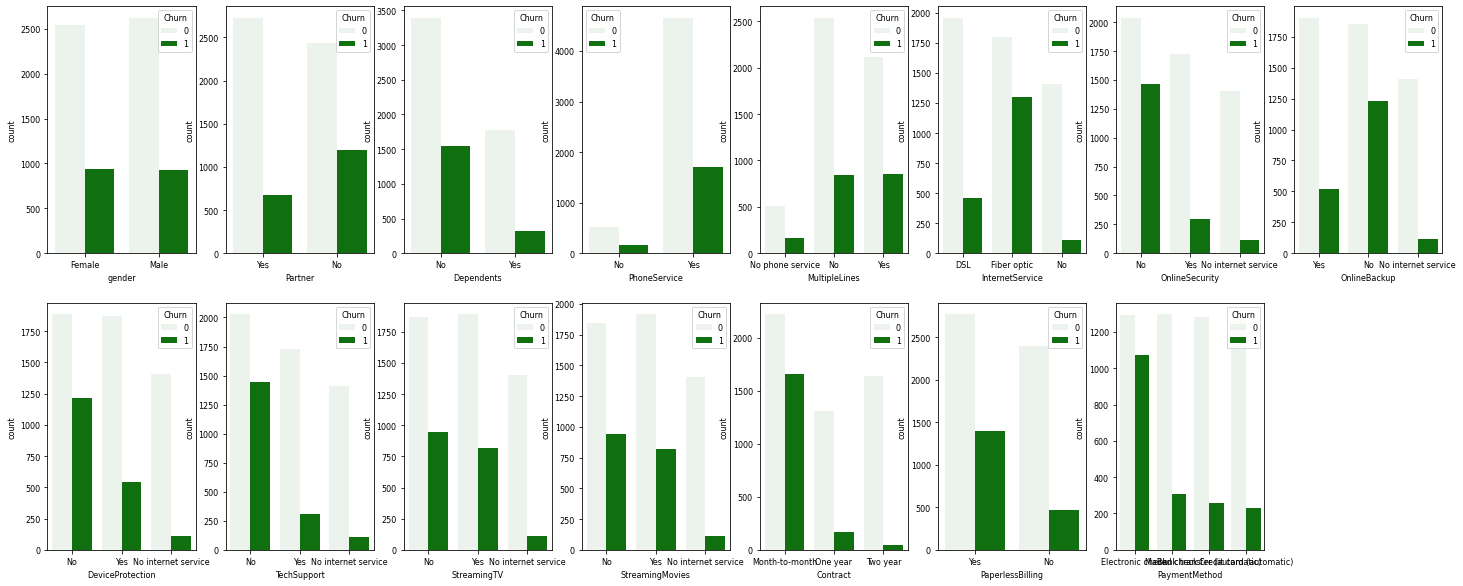

In [86]:
plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 8})
features = ctg
for i in range(0, len(features)):
    plt.subplot(2, len(features)//2 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.countplot(data=dfn,x=dfn[features[i]],hue='Churn',color='green')
    plt.xlabel(features[i])
    

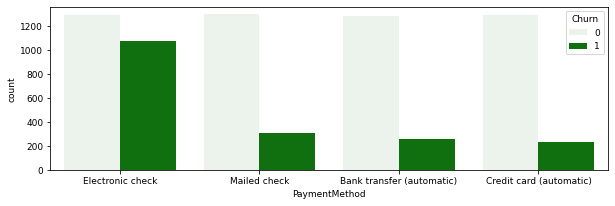

In [87]:
plt.figure(figsize=(10,3))
plt.rcParams.update({'font.size': 9})
sns.countplot(data=dfn,
            hue='Churn',
            x='PaymentMethod',color='green')

**Inference**,

The Background of Behaviour Costumers which not give Churn rate  are mostly =


*   have Partner , 


*   Both of with dependents and without dependents are effect the churn equally


equally but 
*   Use Phoneservices with no multiplelines
*   Use DSL Internet Service with Online Security,Online Backup,Device Protection, Tech Support, Streaming TV and Movies

*   Have two years contract
*   No Paperless Billing and using Credit Card payment







,








# **EDA Conclussion**


*   There are only some Missing values and No duplicated rows. We've handled them with droping method

*   There is  skewed plot on some feature (log transformation is necessary if implemented on modelling)

*   There is no Outliers on the data

*   total charges and tenure are highly correlated each other we can choose for modelling later




#Split Data

In [88]:
dfn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


In [89]:
numericals['TotalCharges'] = np.log(nuv['TotalCharges'] + 1)#log transformation if used for modelling

In [90]:
numericals.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn
0,0,1,29.85,3.429137,0
1,0,34,56.95,7.544597,0
2,0,2,53.85,4.692723,1
3,0,45,42.30,7.518471,0
4,0,2,70.70,5.028148,1


In [91]:
# split train test
from sklearn.model_selection import train_test_split

feature = numericals.drop(columns='Churn')
target = numericals[['Churn']]

# First splitting: pretrain and test
feature_train, feature_test, target_train, target_test = train_test_split(feature, target, test_size=0.20, random_state=42)



# ● Multicollinearity study (10 points)
- And feature selection (if any)
- Recall: the threshold is at least 0.8 (absolute value)

In [92]:
# calculate VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,SeniorCitizen,1.051076
2,tenure,4.500791
3,MonthlyCharges,2.099405
4,TotalCharges,6.327675


Standard rule for VIF :

- VIF == 1 → No multicollinearity
- VIF between 4 and 10 → Moderate multicollinearity
- VIF > 10 → Severe multicollinearity

Actual Data :

- There are No Multicol except ['tenure' and 'Totalcharges'] are Moderate Multicol

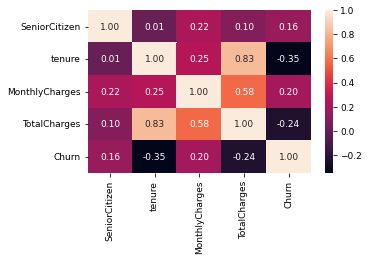

In [93]:
# heatmap correlation
telco_train = pd.concat([feature_train, target_train], axis=1)
corr = telco_train.corr()

plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

- Standard Rule of high corr

- Threshold: abs(corr) >= 0.8,

- Actual observation from heatmap

There are strong corr between tenure (0.83) and Total Charges (0.83), anyway just drop the lower value between tenure and Total Charges toward Churn.
drop Totalcharges (-0.24)

In [94]:
#feature high coor >=0.8 will be drop
feature_train = feature_train.drop(columns=['TotalCharges']) 
feature_test = feature_test.drop(columns=['TotalCharges'])

In [95]:
# re-check calculation VIF scores for each feature
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,SeniorCitizen,1.050840
2,tenure,1.067015
3,MonthlyCharges,1.118902


*There is no Multicol*

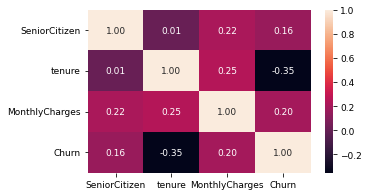

In [96]:
# re-check heatmap correlation
telco_train = pd.concat([feature_train, target_train], axis=1)
corr = telco_train.corr()

plt.figure(figsize=(5,3))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

# Handle categorical data (20 points)
- Column with 2 distinct values → convert to binary numeric {0,1}
- Else → One Hot Encode

In [97]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7032 non-null   object 
 1   SeniorCitizen     7032 non-null   int64  
 2   Partner           7032 non-null   object 
 3   Dependents        7032 non-null   object 
 4   tenure            7032 non-null   int64  
 5   PhoneService      7032 non-null   object 
 6   MultipleLines     7032 non-null   object 
 7   InternetService   7032 non-null   object 
 8   OnlineSecurity    7032 non-null   object 
 9   OnlineBackup      7032 non-null   object 
 10  DeviceProtection  7032 non-null   object 
 11  TechSupport       7032 non-null   object 
 12  StreamingTV       7032 non-null   object 
 13  StreamingMovies   7032 non-null   object 
 14  Contract          7032 non-null   object 
 15  PaperlessBilling  7032 non-null   object 
 16  PaymentMethod     7032 non-null   object 


In [98]:
m=dfn.columns.unique()
for i in m:
  print(i,df[i].unique())

gender ['Female' 'Male']
SeniorCitizen [0 1]
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
tenure [ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
MonthlyCharges [29.85 56.95 53.85 ... 63.1  44.2  78.7 ]
TotalCharges ['29.85' '1889

In [99]:
dfn.columns.unique()

Index(['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'tenure',
       'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod',
       'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [100]:
### Encoding yes no
yes_no_dict = {
    'Yes':int(1),
    'No':0,
    
}

for colname in ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling']:
    dfn[colname] = dfn[colname].map(yes_no_dict)

In [101]:
### Onehot Encoding
onehot_columns = ['gender','MultipleLines', 'InternetService', 'OnlineSecurity',
       'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV',
       'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']
dfn = pd.get_dummies(dfn, columns = onehot_columns)

In [102]:
dfn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 43 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   SeniorCitizen                            7032 non-null   int64  
 1   Partner                                  7032 non-null   int64  
 2   Dependents                               7032 non-null   int64  
 3   tenure                                   7032 non-null   int64  
 4   PhoneService                             7032 non-null   int64  
 5   MonthlyCharges                           7032 non-null   float64
 6   TotalCharges                             7032 non-null   float64
 7   Churn                                    7032 non-null   int64  
 8   gender_Female                            7032 non-null   uint8  
 9   gender_Male                              7032 non-null   uint8  
 10  MultipleLines_No                         7032 no

*All Data has been bined*

# Choose the appropriate metric for fitting the model (10 points)

In [107]:
# as always, first thing is to split the data
from sklearn.model_selection import train_test_split

X = dfn.drop(columns='Churn').to_numpy()
y = dfn[['Churn']].to_numpy()
y = y.reshape(len(y),) # sklearn's shape requirement

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [104]:
dfn['Churn'].value_counts() #evaluasi target

0    5163
1    1869
Name: Churn, dtype: int64

The distribution churn is not imbalance so avoid use Accuracy. Better use recall (sensitivity) instead of Accuracy since we have to retain the as much as possible customer

In [108]:
# pake random forest dengan metric  ke recall
from sklearn.ensemble import RandomForestClassifier

rf_clf = RandomForestClassifier(random_state=42)

In [115]:
#pake KNN dengan metric recall
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()

# hyperparameter tuning
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8)
}

knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8)},
             scoring='recall')

# Train any classification model you’d prefer (30 points)
- YET please ensure you do hyperparameter tuning


**Pake Random forest** pake random bukan grid search biar cepet dan ga lag

In [109]:
%%time
# using random search CV
from sklearn.model_selection import RandomizedSearchCV

parameters = {
    'n_estimators': (10,20,30,40,50),
    'max_depth':(1,2,3,4,5)
}

rf_clf_randomcv = RandomizedSearchCV(rf_clf, parameters, cv=5, 
                                     scoring='recall', n_iter=10)
rf_clf_randomcv.fit(X_train, y_train)

CPU times: user 3.86 s, sys: 0 ns, total: 3.86 s
Wall time: 3.86 s


RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   param_distributions={'max_depth': (1, 2, 3, 4, 5),
                                        'n_estimators': (10, 20, 30, 40, 50)},
                   scoring='recall')

In [110]:
# results of RandomSearchCV
cv_result = pd.DataFrame(rf_clf_randomcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')

,params,mean_test_score,rank_test_score
6,"{'n_estimators': 10, 'max_depth': 5}",0.474916,1
5,"{'n_estimators': 50, 'max_depth': 5}",0.468227,2
7,"{'n_estimators': 40, 'max_depth': 4}",0.410033,3
4,"{'n_estimators': 10, 'max_depth': 4}",0.402676,4
3,"{'n_estimators': 40, 'max_depth': 3}",0.292308,5
2,"{'n_estimators': 30, 'max_depth': 2}",0.140468,6
9,"{'n_estimators': 40, 'max_depth': 2}",0.120401,7
0,"{'n_estimators': 20, 'max_depth': 1}",0.000000,8
1,"{'n_estimators': 40, 'max_depth': 1}",0.000000,8
8,"{'n_estimators': 30, 'max_depth': 1}",0.000000,8


sebanyak 77 yang diprediksi churn ternyata tidak churn



**Pake KNN**

In [116]:
# the compact results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols]

,params,mean_test_score,rank_test_score
0,{'n_neighbors': 2},0.274247,7
1,{'n_neighbors': 3},0.479599,1
2,{'n_neighbors': 4},0.349833,6
3,{'n_neighbors': 5},0.462876,2
4,{'n_neighbors': 6},0.361873,4
5,{'n_neighbors': 7},0.446823,3
6,{'n_neighbors': 8},0.359197,5


n ke 3 punya nilai 47% masih jelek sih sebenernya tapi lebih baik daripada random forest 40%

In [117]:
# what if we also want to tune "weights" hyperparameter
# "uniform": all K neighbors have the same influence
# "distance": closer neighbor in those K neighbors has stronger influence
from sklearn.model_selection import GridSearchCV

parameters = {
    'n_neighbors': (2,3,4,5,6,7,8),
    'weights':('uniform','distance')
}

In [118]:
# now we use recall (sensitivity) as metric
knn_clf_gridcv = GridSearchCV(knn_clf, parameters, cv=5, scoring='recall')
knn_clf_gridcv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': (2, 3, 4, 5, 6, 7, 8),
                         'weights': ('uniform', 'distance')},
             scoring='recall')

In [119]:
# the results
cv_result = pd.DataFrame(knn_clf_gridcv.cv_results_)
retain_cols = ['params','mean_test_score','rank_test_score']
cv_result[retain_cols].sort_values('rank_test_score')



,params,mean_test_score,rank_test_score
2,"{'n_neighbors': 3, 'weights': 'uniform'}",0.479599,1
1,"{'n_neighbors': 2, 'weights': 'distance'}",0.477592,2
5,"{'n_neighbors': 4, 'weights': 'distance'}",0.473579,3
3,"{'n_neighbors': 3, 'weights': 'distance'}",0.470234,4
9,"{'n_neighbors': 6, 'weights': 'distance'}",0.466221,5
7,"{'n_neighbors': 5, 'weights': 'distance'}",0.465552,6
6,"{'n_neighbors': 5, 'weights': 'uniform'}",0.462876,7
11,"{'n_neighbors': 7, 'weights': 'distance'}",0.456856,8
13,"{'n_neighbors': 8, 'weights': 'distance'}",0.448829,9
10,"{'n_neighbors': 7, 'weights': 'uniform'}",0.446823,10


# Evaluate the model on test data (10 points)

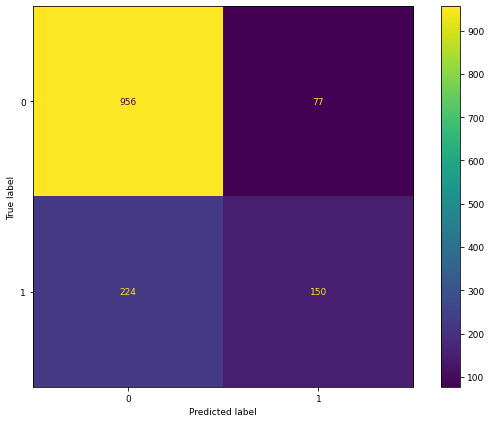

In [111]:
# the confusion matrix RandomForest
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=rf_clf_randomcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=rf_clf_randomcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [114]:
# classification report
from sklearn.metrics import classification_report
y_pred = rf_clf_randomcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.93      0.86      1033
           1       0.66      0.40      0.50       374

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



- Hasil Evaluasi dengan model random forest bad karena menghasilkan nilai Recall 0.40
- Insight dari Recall:
Dari semua yang sebenarnya churn, yang diprediksi benar churn 40%. 


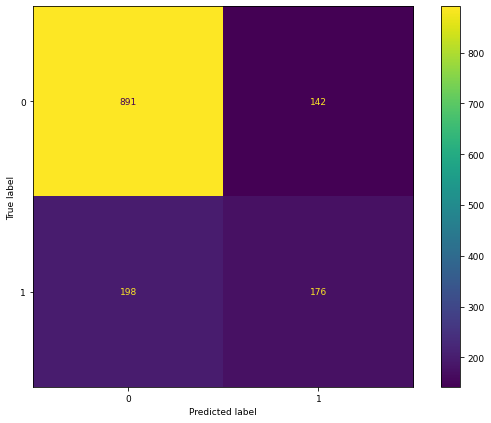

In [122]:
# plotting confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

fig, ax = plt.subplots(figsize=(10,7))
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred, labels=knn_clf_gridcv.best_estimator_.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=knn_clf_gridcv.best_estimator_.classes_)
disp.plot(ax=ax)
plt.show()

In [121]:
# classification report
from sklearn.metrics import classification_report
y_pred = knn_clf_gridcv.best_estimator_.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.86      0.84      1033
           1       0.55      0.47      0.51       374

    accuracy                           0.76      1407
   macro avg       0.69      0.67      0.67      1407
weighted avg       0.75      0.76      0.75      1407



- Hasil Evaluasi dengan model KNN lebih baik sedikit daripada Random Forest cuma tetetp bad karena menghasilkan nilai Recall 0.47 

- Insight dari Recall: Dari semua yang sebenarnya churn, yang diprediksi benar churn 47%.